In [57]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



In [58]:
front = cv2.imread(r'C:\Users\Aman\Desktop\TRINA\OPENCV\DistortionImages\MaskTest\frontStitch_warped.png')
left = cv2.imread(r'C:\Users\Aman\Desktop\TRINA\OPENCV\DistortionImages\MaskTest\leftStitch_warped.png')
back = cv2.imread(r'C:\Users\Aman\Desktop\TRINA\OPENCV\DistortionImages\MaskTest\backStitch_warped.png')
right = cv2.imread(r'C:\Users\Aman\Desktop\TRINA\OPENCV\DistortionImages\MaskTest\rightStitch_warped.png')

# cv2.imshow('', front)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [59]:
front.shape

(961, 1978, 3)

(array([  0,   0,   0, ..., 960, 960, 960], dtype=int64), array([   0,    1,    2, ..., 1975, 1976, 1977], dtype=int64))


In [61]:
def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H'''
    mask = np.all(img1==np.array([0,0,0]).reshape(1,1,3), axis = 2)

    blackPixels = np.where(mask == False)
#     print(blackPixels)
    
    h1,w1 = img1.shape[:2]
    h2,w2 = img2.shape[:2]
    pts1 = np.float32([[0,0],[0,h1],[w1,h1],[w1,0]]).reshape(-1,1,2)
    pts2 = np.float32([[0,0],[0,h2],[w2,h2],[w2,0]]).reshape(-1,1,2)
    pts2_ = cv2.perspectiveTransform(pts2, H)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin,-ymin]
    Ht = np.array([[1,0,t[0]],[0,1,t[1]],[0,0,1]]) # translate
    
    

    result = cv2.warpPerspective(img2, Ht.dot(H), (xmax-xmin, ymax-ymin))
    
    result[t[1]+blackPixels[0],t[0]+blackPixels[1],:] = img1[blackPixels[0],blackPixels[1],:]
    return result

In [62]:
frontAlpha = cv2.cvtColor(front, cv2.COLOR_BGR2BGRA) #opens up the alpha channel 

alpha = frontAlpha[:, :, 3] 

alpha[np.all(frontAlpha[:, :, 0:3] == (0,0,0)), 2] = 0

# print(frontAlpha[:,:,3])

cv2.imshow('', frontAlpha)
cv2.waitKey(0)
cv2.destroyAllWindows()

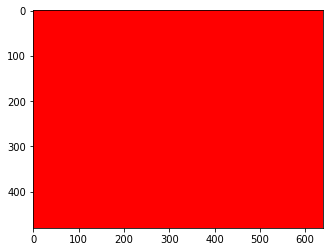

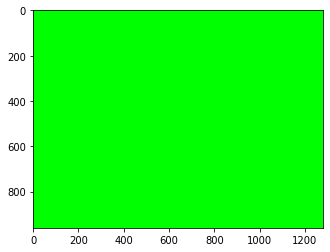

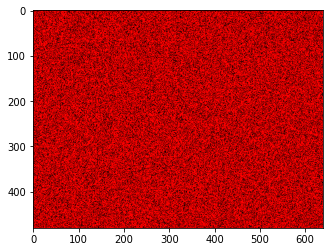

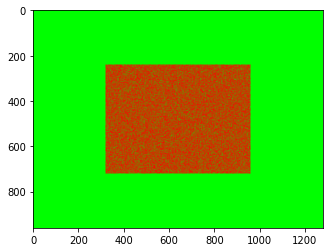

In [87]:
#front is array height x width x 3

a = np.zeros((480,640,3)).astype(np.uint8)
b = np.zeros((960,1280,3)).astype(np.uint8)
a[:,:,0] = 255
b[:,:,1] = 255
plt.imshow(a)
plt.show()
plt.imshow(b)
plt.show()
# a[240:,320:,0] = 0
npoints = 100000
x = np.random.randint(0,480,npoints)
y = np.random.randint(0,640,npoints)
a[x,y,:] = 0
a = a.astype(np.uint8)
plt.imshow(a)


mask = np.all(a==np.array([0,0,0]).reshape(1,1,3), axis = 2)
pos = np.where(mask == False)
plt.imshow(a)
plt.show()
b[480//2 + pos[0],640//2+pos[1],:] = a[pos[0],pos[1],:]
plt.imshow(b)
plt.show()
# mask = np.any(a != [0,0,0], axis = 2)
# mask_positions = np.where(mask==True)

# print(mask_positions, front, 0)
# cv2.imshow('',mask_positions[2])
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [9]:
# help(np.any)

np.where(mask==0, 0, front)

ValueError: operands could not be broadcast together with shapes (961,1978) () (961,1978,3) 

In [52]:
front[front > 0]
np.where(front>0)
front.shape

(961, 1978)

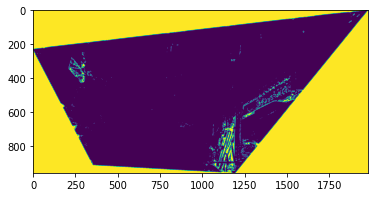

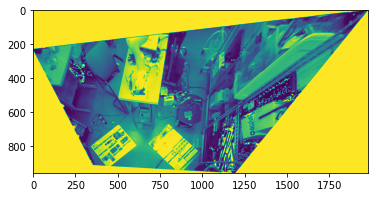

In [43]:
front = cv2.cvtColor(front, cv2.COLOR_BGR2GRAY)
print(front.sh)
mask = front<10
plt.figure()
plt.imshow(mask)
plt.show()


front[mask] = 255
plt.figure()
plt.imshow(front)
plt.show()